### Limpieza de datos

In [3]:
# Importamos librerias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Lectura del archivo csv
df = pd.read_csv('sales_data.csv', encoding='ISO-8859-1')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


### Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Registros (filas) repetidos
3. Valores extremos (*outliers*)

Al final de este proceso de limpieza tendremos un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

In [5]:
# Primero verifiquemos que columnas poseen valores nulos
nulos=df.isnull().sum()
nulos

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

### Observamos que las columnas con valores nulos son:
- ADDRESSLINE2 con 2512 valores nulos
- STATE con 1486 valores nulos
- POSTALCODE con 76 valores nulos
- TERRITORY con 1074 valores nulos

Estas columnas no son claves para el analisis de datos, asi que las eliminaremos.

In [6]:
print(f'Número de columnas totales: {df.shape[1]}')
#Eliminar columnas con valores nulos
df.drop(columns=['ADDRESSLINE2', 'STATE','POSTALCODE', 'TERRITORY'],inplace=True)
print(f'Nuevo número de columnas: {df.shape[1]}')


Número de columnas totales: 25
Nuevo número de columnas: 21


Ahora eliminaremos registros con filas repetidas.

In [7]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (2823, 21)
Tamaño del set después de eliminar las filas repetidas: (2823, 21)


No hubieron filas repetidas

### Valores extremos (Outliers)

In [8]:
cols_numericas = df.select_dtypes(include=['int64', 'float64']).columns
cols_numericas

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP'],
      dtype='object')

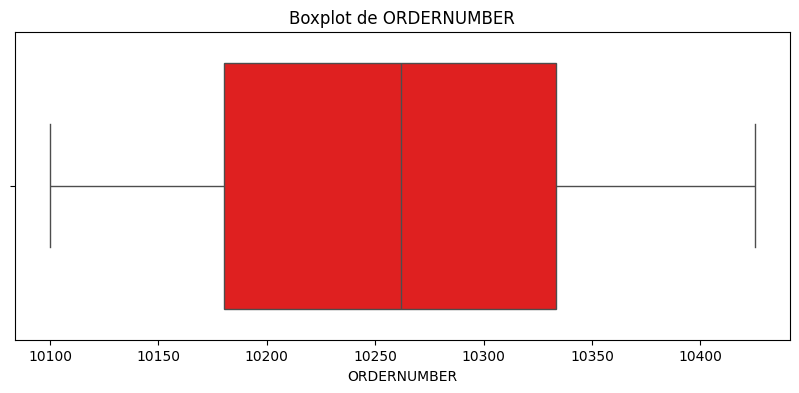

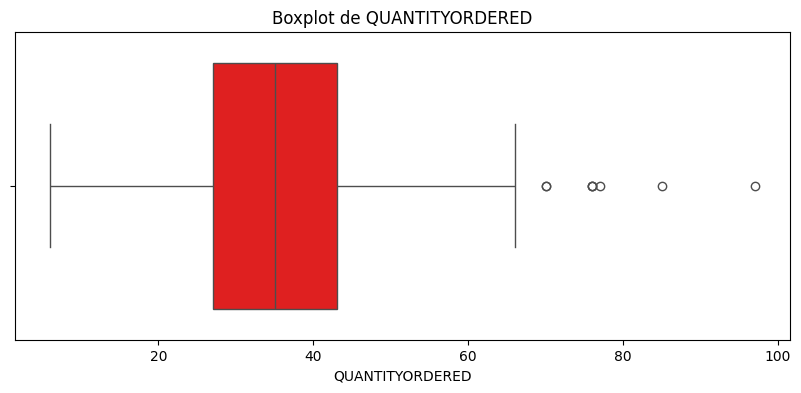

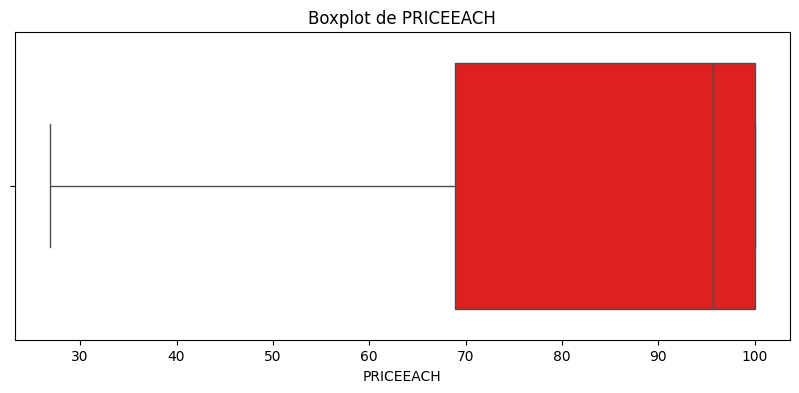

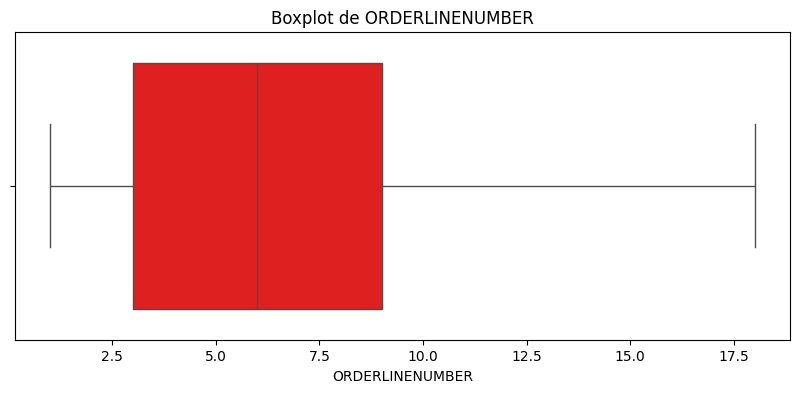

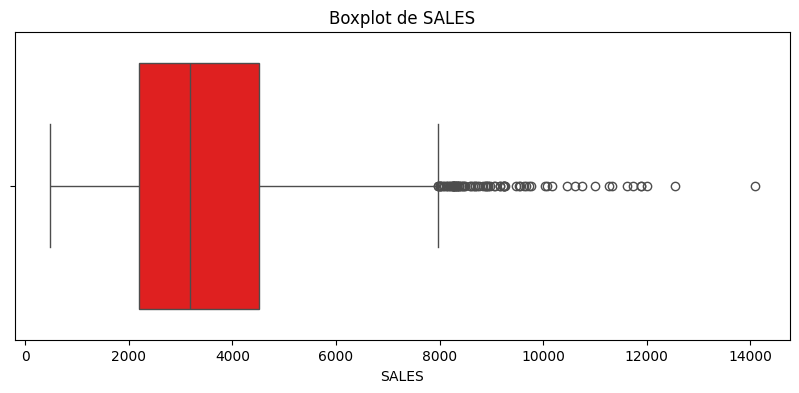

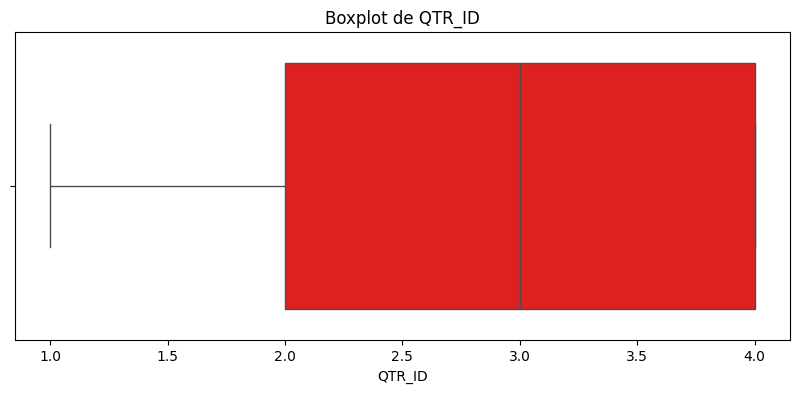

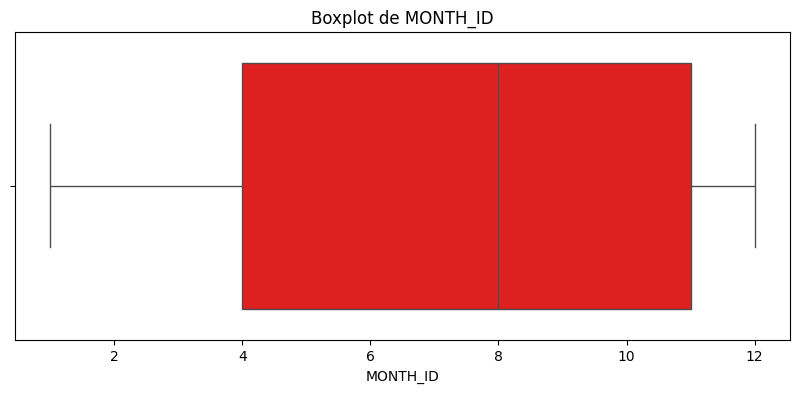

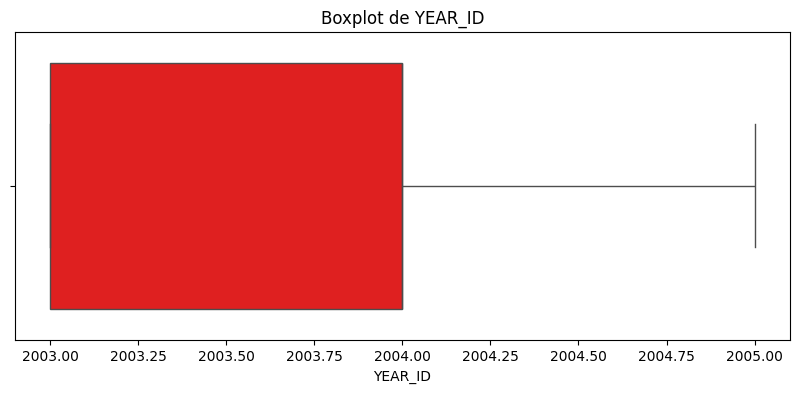

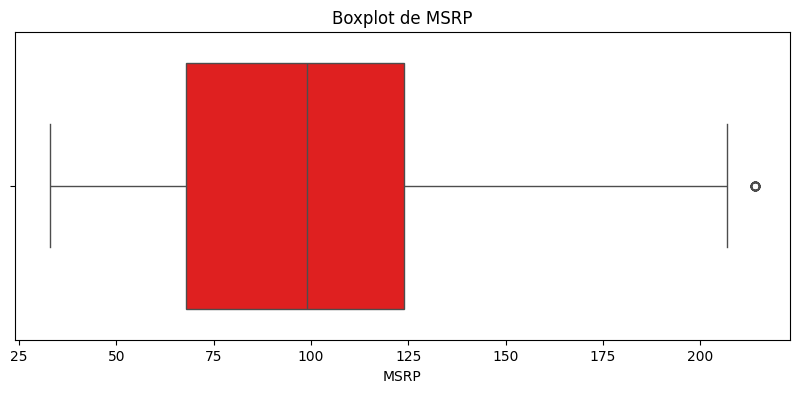

In [9]:
#Genrerar gráficas individuales pues la variables numerícas estan en rangos diferentes
cols_numericas = df.select_dtypes(include=['int64', 'float64']).columns
for col in cols_numericas:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col],data=df,color='red')
    plt.title(f'Boxplot de {col}')
    plt.show()

### Podemos visualizar valores extremos en las columnas:
- QUANTITY ORDERED
- SALES
- MRSP

Sin embargo, no debemos eliminarlos, poseen valores atípicos pero estan dentro del contexto de los datos.


Finalmente tenemos una base de datos integro.

In [10]:
df_integro=df.copy()
df_integro.to_csv('sales_data_integro.csv', index=False)